# Privacy-Preserving Techniques for LLM Code Completion: Andrei Oprescu

This jupyter notebook is dedicated to completing the task for the Privacy-Preserving Techniques for LLM Code Completion JetBrains task. Below you can find the submission.

First, lets install the dependencies and import the required libraries

In [1]:
%pip install transformers torch
%pip install pandas
%pip install datasets
%pip install numpy
%pip install rouge-score
%pip install matplotlib
%pip install accelerate
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

  Using cached transformers-4.57.3-py3-none-any.whl.metadata (43 kB)
  Using cached tokenizers-0.22.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached transformers-4.57.3-py3-none-any.whl (12.0 MB)
   ---------------------------------------- 0.0/566.1 kB ? eta -:--:--
   ---------------------------------------- 566.1/566.1 kB 6.6 MB/s  0:00:00
Using cached tokenizers-0.22.1-cp39-abi3-win_amd64.whl (2.7 MB)
   ---------------------------------------- 0.0/111.0 MB ? eta -:--:--
   -- ------------------------------------- 6.6/111.0 MB 31.0 MB/s eta 0:00:04
   ----- ---------------------------------- 15.2/111.0 MB 35.4 MB/s eta 0:00:03
   -------- ------------------------------- 23.6/111.0 MB 37.3 MB/s eta 0:00:03
   ----------- ---------------------------- 31.7/111.0 MB 37.3 MB/s eta 0:00:03
   -------------- ------------------------- 39.6/111.0 MB 38.1 MB/s eta 0:00:02
   ---------------- ----------------------- 45.9/111.


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ------------ --------------------------- 3.4/11.3 MB 22.3 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.3 MB 29.0 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 26.3 MB/s  0:00:00

   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached xxhash-3.6.0-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached frozenlist-1.8.0-cp311-cp311-win_amd64.whl.metadata (21 kB)
  Using cached multidict-6.7.0-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached propcache-0.4.1-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached yarl-1.22.0-cp311-cp311-win_amd64.whl.metadata (77 kB)
Using cached dill-0.4.0-py3-none-any.whl (119 kB)
Using cached multidict-6.7.0-cp311-cp311-win_amd64.whl (46 kB)
Using cached yarl-1.22.0-cp311-cp311-win_amd64.whl (86 kB)
Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl (15 kB)
Using cached aiosignal-1.4.0-py3-none-any.whl (7.5 kB)
Using cached frozenlist-1.8.0-cp311-cp311-win_amd64.whl (44 kB)
Using cached propcache-0.4.1-cp311-cp311-win_amd64.whl (41 kB)
   ------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached rouge_score-0.1.2-py3-none-any.whl
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)

   ---------------------------------------- 0/5 [joblib]
   ---------------------------------------- 0/5 [joblib]
   ---------------------------------------- 0/5 [joblib]
   ---------------------------------------- 0/5 [joblib]
   ---------------------------------------- 0/5 [joblib]
   ---------------------------------------- 0/5 [joblib]
   ---------------------------------------- 0/5 [joblib]
   ---------------------------------------- 0/5 [joblib]
   ---------------------------------------- 0/5 [joblib]
   ---------------------------------------- 0/5 [joblib]
   ---------------------------------------- 0/5 [joblib]
   ---------------------------------------- 0/5 [joblib]
   ----------------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------- ------------------ 4.5/8.1 MB 26.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 25.2 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 26.5 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   -------------------------------------- - 6.8/7.0 MB 42.0 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 33.2 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   --


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.20.1%2Bcu121-cp311-cp311-win_amd64.whl (6.1 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.5.1%2Bcu121-cp311-cp311-win_amd64.whl (4.1 MB)
  Using cached https://download.pytorch.org/whl/cu121/torch-2.5.1%2Bcu121-cp311-cp311-win_amd64.whl (2449.4 MB)
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------- ----------------------- 2.6/6.2 MB 18.9 MB/s eta 0:00:01
   -------------------------------------- - 6.0/6.2 MB 20.5 MB/s eta 0:00:01
   -------------------------------------- - 6.0/6.2 MB 20.5 MB/s eta 0:00:01
   -------------------------------------- - 6.0/6.2 MB 20.5 MB/s eta 0:00:01
   -------------------------------------- - 6.0/6.2 MB 20.5 MB/s eta 0:00:01
   -------------------------------------- - 6.0/6.2 MB 20.5 MB/s eta 0:00:01
   -------------------------------------- - 6.0/6.2 MB 20.5 MB/s eta


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from datasets import load_dataset
import re
import pandas
import numpy as np
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

C:\Users\aopre\OneDrive\Desktop\JetBrains Task 22\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Fetching and Preprocessing

Next, we will get the dataset from HuggingFace.

In [3]:
dataset = load_dataset("openai_humaneval", split="test")
dataset.set_format("pandas")
print("Length: ", len(dataset))

Length:  164


Get the first 20 examples for the code completion and print one out.

In [4]:
first20 = dataset[:20][["task_id", "prompt", "canonical_solution"]]
print(first20.iloc[1])

task_id                                                     HumanEval/1
prompt                from typing import List\n\n\ndef separate_pare...
canonical_solution        result = []\n    current_string = []\n    ...
Name: 1, dtype: object


For the low obfuscation version, I decided to remove the variable and method data types. This should not affect the code completion model's ability to understand the task too much, since it can still make out what the variable and method are supposed to be used for from the method name, comments, and variable name.

In [5]:
def remove_types(match):
    # Clean the signature string found by the main regex
    signature = match.group(0)
    # Remove param types by looking for the colon
    signature = re.sub(r":\s*[^,)=]+", "", signature)
    # Remove return type by looking for the ->
    signature = re.sub(r"->\s*[^:]+", "", signature)
    return signature

def low_obfuscation(df: pandas.DataFrame) -> pandas.DataFrame:
    # Define the method signature regex expression
    signature_pattern = r"def\s+\w+\s*\(.*?\)\s*->\s*[^:]+:|def\s+\w+\s*\(.*?\):"
    # Make a copy to not edit the original DataFrame
    df_copy = df.copy()
    
    # Make helper to handle regex for each prompt
    def process_prompt(text):
        return re.sub(signature_pattern, remove_types, text)
                      
    # Create new column "edited_prompt" with apply and helper
    df_copy['edited_prompt'] = df_copy["prompt"].apply(process_prompt)
    return df_copy


Now let's create the low-obfuscated prompts and save them.

In [6]:
# Get the low-obfuscated prompts and print one
first20_low_obfuscation = low_obfuscation(first20)
print(first20_low_obfuscation.iloc[1]["edited_prompt"])

from typing import List


def separate_paren_groups(paren_string) :
    """ Input to this function is a string containing multiple groups of nested parentheses. Your goal is to
    separate those group into separate strings and return the list of those.
    Separate groups are balanced (each open brace is properly closed) and not nested within each other
    Ignore any spaces in the input string.
    >>> separate_paren_groups('( ) (( )) (( )( ))')
    ['()', '(())', '(()())']
    """



For the high-obfuscation, I decided to just remove the single-line and multi-line comments from the method. This should make it harder for the code completion model to understand how to autocomplete the code, since pretty much the only piece of information it has about its task is the method signature.

In [7]:
def high_obfuscation(df: pandas.DataFrame) -> pandas.DataFrame:
    # Define the multi-line and single line regex expressions
    doc_pattern = r"\"\"\".*?\"\"\"|'''.*?'''"
    inline_pattern = r"#.*?$"
    # Make a copy of the DataFrame to not override the prompts from the original DataFrame
    df_copy = df.copy()
    
    # Make helper for removing comments
    def clean_comments(text):
        text = re.sub(doc_pattern, "", text, flags=re.DOTALL)
        text = re.sub(inline_pattern, "", text, flags=re.MULTILINE)
        return text

    # Create new column "edited_prompt" with apply and helper
    df_copy['edited_prompt'] = df_copy["prompt"].apply(clean_comments)

    return df_copy


Create the high-obfuscated prompts and save them.

In [8]:
first20_high_obfuscation = high_obfuscation(first20)
print(first20_high_obfuscation.iloc[1]["edited_prompt"])

from typing import List


def separate_paren_groups(paren_string: str) -> List[str]:
    



Let's also make the 'edited_prompt' column for the original prompt df for consistency.

In [9]:
first20['edited_prompt'] = first20['prompt']
print(first20.iloc[1]["edited_prompt"])

from typing import List


def separate_paren_groups(paren_string: str) -> List[str]:
    """ Input to this function is a string containing multiple groups of nested parentheses. Your goal is to
    separate those group into separate strings and return the list of those.
    Separate groups are balanced (each open brace is properly closed) and not nested within each other
    Ignore any spaces in the input string.
    >>> separate_paren_groups('( ) (( )) (( )( ))')
    ['()', '(())', '(()())']
    """



### Code Autocompletion

Next, we will get a model from HuggingFace to autocomplete the method functionality. I chose a model with less parameters, since the obfuscation methods should have a higher effect on its performance since it's harder for it to analyse the task, allowing us to see a bigger effect of these obfuscation methods. Additionally, this improved the download speed of the model as well as inference times. The model parameter count can be changed by you by changing the "3B" part of the model_name to any of the following values:  0.5B, 1.5B, 3B, 7B, 14B, 32B

In [10]:
# Choose a low-parameter model (1.5B parameters)
model_name = "Qwen/Qwen2.5-Coder-3B-Instruct"
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device: ", device)

# Load tokenizer and model and use the GPU as the device
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map=device
)



device:  cuda


`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 2/2 [00:22<00:00, 11.23s/it]


Next, I created a method for completing the code of the 20 prompts in the DataFrame. Since I gave the model no other information, I defined a list of stop strings. The model will stop writing more code once it writes these keywords. Namely, it will stop if it tries to create another method, class or run the code it created in an "if \_\_name\_\_ == '\_\_init\_\_':" statement.



In [11]:
stop_strings = ["\ndef", "\nclass", "\nif __name__"]

def complete_code(df: pandas.DataFrame) -> pandas.DataFrame:
  # Store the completions
  completions = []

  for _, row in df.iterrows():
    # Tokenize the prompt
    inputs = tokenizer(row['edited_prompt'], return_tensors="pt").to(model.device)
    prompt_length = inputs.input_ids.shape[1]
    # Generate the output of the model for the prompt
    outputs = model.generate(
        **inputs,
        max_new_tokens=128,
        tokenizer=tokenizer,
        stop_strings=stop_strings,
        temperature=0.1, # Lower temperature for more deterministic and accurate code
        do_sample=True
    )

    # Decode and store the result
    completion_tokens = outputs[0][prompt_length:]
    completion = tokenizer.decode(completion_tokens, skip_special_tokens=True)
    completions.append((completion, row['canonical_solution']))

  return completions

Next, let's get the code completions of the original, low-obfuscated and high-obfuscated prompts.

In [12]:
first20_completions = complete_code(first20)
first20_low_obfuscation_completions = complete_code(first20_low_obfuscation)
first20_high_obfuscation_completions = complete_code(first20_high_obfuscation)

### Evaluation

I first created the methods for normalized Levenshtein for privacy score and ROUGE score for utility score. I implemented the normalized Levenshtein algorithm myself. For the ROUGE scores, I decided to use a library which calculates them itself.

For the ROUGE score, I decided to look at the longest common subsequence (ROUGE-L). I retrieved the precisions, recalls and F-scores of the completions.

In [13]:
def normalized_levenshtein(str1: str, str2: str) -> float:
  # Get lengths
  l1 = len(str1)
  l2 = len(str2)

  # Create the memoization 2-D array
  mem = np.zeros((l1 + 1, l2 + 1))

  # Fill in the base values for both words
  for i in range(l1 + 1):
    mem[i][0] = i

  for j in range(l2 + 1):
    mem[0][j] = j

  # Fill in the matrix
  for i in range(1, l1 + 1):
    for j in range(1, l2 + 1):
      if str1[i - 1] == str2[j - 1]:
        # If the characters match
        mem[i][j] = mem[i - 1][j - 1]
      else:
        # If the characters don't match
        mem[i][j] = 1 + max(mem[i - 1][j], max(mem[i][j - 1], mem[i - 1][j - 1]))

  # Get the distance between the two words
  distance = mem[l1][l2]

  # Return the normalized distance
  return distance / max(l1, l2)


def perform_levenshtein(df: pandas.DataFrame) -> int:
  """
    Perform normalized Levenshtein distance on completions-solution tuple pairs.
    Return the average Levenshtein distance.
  """
  total = 0
  distances = []
  for _, row in df.iterrows():
    distance = normalized_levenshtein(row['prompt'], row['edited_prompt'])
    distances.append(distance)
    total += distance

  return distances

def get_rouge_score(completions):
  """
    Get the ROUGE score of the completion-solution tuple pairs.
    Return precisions, recalls and f-measures.
  """
  precisions = []
  recalls = []
  fmeasures = []

  n = len(completions)

  for completion, solution in completions:
    # Create the ROUGE scorer and get the score for the completion
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    scores = scorer.score(completion, solution)

    # Store the results
    for key, value in scores.items():
        print(key, value)
        precisions.append(value.precision)
        recalls.append(value.recall)
        fmeasures.append(value.fmeasure)

  # Return the precision, recall and F-measure scores
  return precisions, recalls, fmeasures


Next, let's get the scores for the original, low-obfuscated and high-obfuscated prompts and group them by score type. I averaged the measures so that the plot can show the big picture of the performance of the models.

In [14]:
# Get the scores
f20_precisions, f20_recalls, f20_fmeasures = get_rouge_score(first20_completions)
low_obfuscation_precisions, low_obfuscation_recalls, low_obfuscation_fmeasures = get_rouge_score(first20_low_obfuscation_completions)
high_obfuscation_precisions, high_obfuscation_recalls, high_obfuscation_fmeasures = get_rouge_score(first20_high_obfuscation_completions)

# Group by score type
precisions = [np.average(f20_precisions), np.average(low_obfuscation_precisions), np.average(high_obfuscation_precisions)]
recalls = [np.average(f20_recalls), np.average(low_obfuscation_recalls), np.average(high_obfuscation_recalls)]
fmeasures = [np.average(f20_fmeasures), np.average(low_obfuscation_fmeasures), np.average(high_obfuscation_fmeasures)]


rougeL Score(precision=0.5, recall=0.48148148148148145, fmeasure=0.49056603773584906)
rougeL Score(precision=0.5813953488372093, recall=0.5952380952380952, fmeasure=0.5882352941176471)
rougeL Score(precision=0.5, recall=0.14285714285714285, fmeasure=0.22222222222222224)
rougeL Score(precision=0.8666666666666667, recall=0.7647058823529411, fmeasure=0.8125)
rougeL Score(precision=0.8125, recall=0.4642857142857143, fmeasure=0.5909090909090908)
rougeL Score(precision=0.5909090909090909, recall=0.65, fmeasure=0.6190476190476191)
rougeL Score(precision=0.4883720930232558, recall=0.4883720930232558, fmeasure=0.4883720930232558)
rougeL Score(precision=0.7, recall=0.5833333333333334, fmeasure=0.6363636363636365)
rougeL Score(precision=0.3333333333333333, recall=0.2692307692307692, fmeasure=0.2978723404255319)
rougeL Score(precision=0.4482758620689655, recall=0.37142857142857144, fmeasure=0.40625)
rougeL Score(precision=0.4074074074074074, recall=0.44, fmeasure=0.4230769230769231)
rougeL Score(p

Finally, I created a method for plotting these scores on a bar graph to showcase the difference in code completion accuracy.

In [15]:
def plot_scores(precisions, recalls, fmeasures):
  # Define the plot categories
  categories = ["No obfuscation", "Low Obfuscation", "High Obfuscation"]
  x = np.arange(len(categories))
  # Set the width of the bars
  width = 0.2

  fig, ax = plt.subplots()

  # Plot the bars with manual offsets
  ax.bar(x - width, precisions, width, label='Precision', color='yellow', edgecolor='grey')
  ax.bar(x, recalls, width, label='Recall', color='blue', edgecolor='grey')
  ax.bar(x + width, fmeasures, width, label='F-Score', color='green', edgecolor='grey')

  ax.set_ylabel('Scores')
  ax.set_title('Grouped Bar Chart Example')
  ax.set_xticks(x)
  ax.set_xticklabels(categories)
  ax.legend()

  # Plot the bar graph
  plt.show()


Next, let's print out the ROUGE scores in a table and plot the graph. I also displayed the standard deviation of the scores so that we can see how much the utility scores vary with the obfuscations.

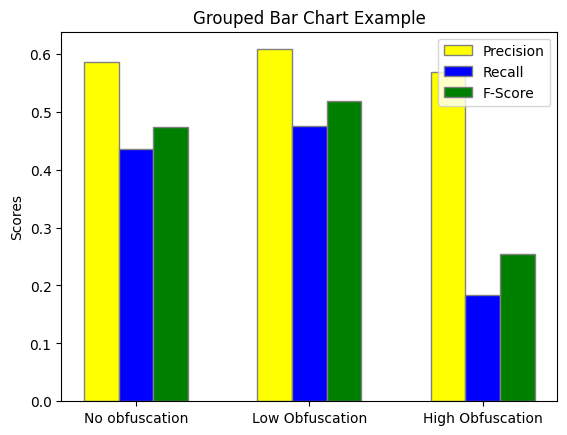

           Original  Low Obfuscation  High Obfuscation
Precision  0.585642         0.607835          0.568610
Recall     0.435950         0.475041          0.183882
F-Score    0.474251         0.517720          0.253964
Original prompt F-measure standard deviation: 0.15703177143892547
Low obfuscation prompt F-measure standard deviation: 0.2099627599571907
High obfuscation prompt F-measure standard deviation: 0.15866542888114438


In [16]:
# Plot the scores
plot_scores(precisions, recalls, fmeasures)

# Define the data for the table
data = {
    'Original': [np.average(f20_precisions), np.average(f20_recalls), np.average(f20_fmeasures)],
    'Low Obfuscation': [np.average(low_obfuscation_precisions), np.average(low_obfuscation_recalls), np.average(low_obfuscation_fmeasures)],
    'High Obfuscation': [np.average(high_obfuscation_precisions), np.average(high_obfuscation_recalls), np.average(high_obfuscation_fmeasures)]
}

# Define the row labels
row_titles = ['Precision', 'Recall', 'F-Score']

# Create the DataFrame
df = pandas.DataFrame(data, index=row_titles)

print(df)
print(f"Original prompt F-measure standard deviation: {np.std(f20_fmeasures)}")
print(f"Low obfuscation prompt F-measure standard deviation: {np.std(low_obfuscation_fmeasures)}")
print(f"High obfuscation prompt F-measure standard deviation: {np.std(high_obfuscation_fmeasures)}")

As we can see from the plot and the table, the less obfuscated code is autocompleted by the code completion model with a high accuracy, achieving an F-Score similar to the original prompt. However, the F-score can also be higher for the low obfuscated prompt than the original prompt. This most likely happens because of the uncertainty of the model; since the obfuscation does not greatly sabotage the model's ability to understand the task to a great extent, it might end up producing better results on occasional cases, but should not end up being overall better if we used more prompts to assess the effect of obfuscation on utility.

However, when we obfuscate the code more (by removing the comments), the task given to the model is less obvious, which causes the F-score to drop substantially. This is expected, as the model has less information to work with.

Therefore, we see the utility of the code to drop as we increase the obfuscation.

Now let's get the levenshtein distances for each version of the prompts.

In [17]:
levenshtein_first20 = perform_levenshtein(first20)
levenshtein_first20_low_obfuscation = perform_levenshtein(first20_low_obfuscation)
levenshtein_first20_high_obfuscation = perform_levenshtein(first20_high_obfuscation)

In [18]:
print("Original prompt Levenshtein score (average): ", np.average(levenshtein_first20))
print("Low-obfuscation prompt Levenshtein score (average): ", np.average(levenshtein_first20_low_obfuscation))
print("High-obfuscation prompt Levenshtein score (average): ", np.average(levenshtein_first20_high_obfuscation))

Original prompt Levenshtein score (average):  0.0
Low-obfuscation prompt Levenshtein score (average):  0.38278903537459275
High-obfuscation prompt Levenshtein score (average):  1.231912594730175


From the normalized Levenshtein distances, we can see that a low-obfuscation of the code affects the privacy very little. However, when we apply a high-obfuscation method, the normalized Levenshtein distances get bigger by a considerable amount.


Next, let's plot the Utility score on the Privacy score in a scatterplot.

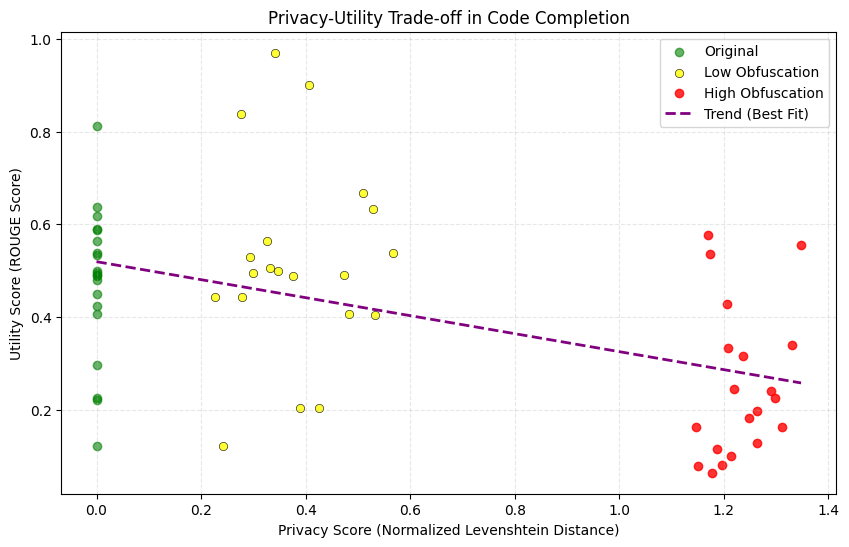

In [19]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot Original Data
plt.scatter(levenshtein_first20, f20_fmeasures, color='green', label='Original', alpha=0.6)

# Plot Low Obfuscation
plt.scatter(levenshtein_first20_low_obfuscation, low_obfuscation_fmeasures, color='yellow', label='Low Obfuscation',
            alpha=0.8, edgecolors='black', linewidths=0.5)

# Plot High Obfuscation
plt.scatter(levenshtein_first20_high_obfuscation, high_obfuscation_fmeasures, color='red', label='High Obfuscation', alpha=0.8)

all_x = np.concatenate([levenshtein_first20, levenshtein_first20_low_obfuscation, levenshtein_first20_high_obfuscation])
all_y = np.concatenate([f20_fmeasures, low_obfuscation_fmeasures, high_obfuscation_fmeasures])

# Calculate the line of best fit
coefficients = np.polyfit(all_x, all_y, 1)
polynomial = np.poly1d(coefficients)

# Make a range of x values for the line of best fit
x_line = np.linspace(all_x.min(), all_x.max(), 100)
y_line = polynomial(x_line)

plt.plot(x_line, y_line, color='purple', linestyle='--', linewidth=2, label=f'Trend (Best Fit)')

# Adding labels and styling
plt.xlabel('Privacy Score (Normalized Levenshtein Distance)')
plt.ylabel('Utility Score (ROUGE Score)')
plt.title('Privacy-Utility Trade-off in Code Completion')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

From the plot, we can see that as the Privacy score increases, the Utility score decreases, as shown by the trend line. As mentioned before, this makes sense, as the more information we remove from the prompt (the higher the privacy), the less useful answers we receive (the lower the utility). Additionally, the red points (highly obfuscated prompts) tend to be lower on the utility score and higher on the normalized Levenshtein score compared to the yellow and green points (less obfuscated and original prompts)